In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans

In [2]:
# Set up the aesthetics for seaborn plots
sns.set(style="whitegrid")


In [3]:
# Load the dataset
data = pd.read_csv(r'C:\Users\hifi\OneDrive\Documents\Projects\Supermarket\supermarket_sales.csv')


In [4]:
print(data.columns)
print(data.head())


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  

In [5]:
# Convert 'Date' column to datetime and remove duplicates
data['Date'] = pd.to_datetime(data['Date'])
data.drop_duplicates(inplace=True)

In [6]:
# Profit Margin Analysis
data['Profit'] = data['Total'] - data['cogs']
data['Profit Margin'] = data['Profit'] / data['Total']

In [7]:
print(data[['Total', 'cogs']].describe())

             Total        cogs
count  1000.000000  1000.00000
mean    322.966749   307.58738
std     245.885335   234.17651
min      10.678500    10.17000
25%     124.422375   118.49750
50%     253.848000   241.76000
75%     471.350250   448.90500
max    1042.650000   993.00000


In [8]:
print("Zero totals:", (data['Total'] == 0).sum())

Zero totals: 0


In [9]:
data['Profit'] = data['Total'] - data['cogs']
data['Profit Margin'] = (data['Profit'] / data['Total'] * 100).where(data['Total'] > 0, 0)

In [10]:
print(data[['Total', 'cogs', 'Profit', 'Profit Margin']].head())


      Total    cogs   Profit  Profit Margin
0  548.9715  522.83  26.1415       4.761905
1   80.2200   76.40   3.8200       4.761905
2  340.5255  324.31  16.2155       4.761905
3  489.0480  465.76  23.2880       4.761905
4  634.3785  604.17  30.2085       4.761905


In [11]:
# Define bins and labels
bins = [-np.inf, 0, 5, 10, 20, np.inf]
labels = ['Negative', '0-5%', '5-10%', '10-20%', '>20%']
data['Profit Margin Bins'] = pd.cut(data['Profit Margin'], bins=bins, labels=labels)




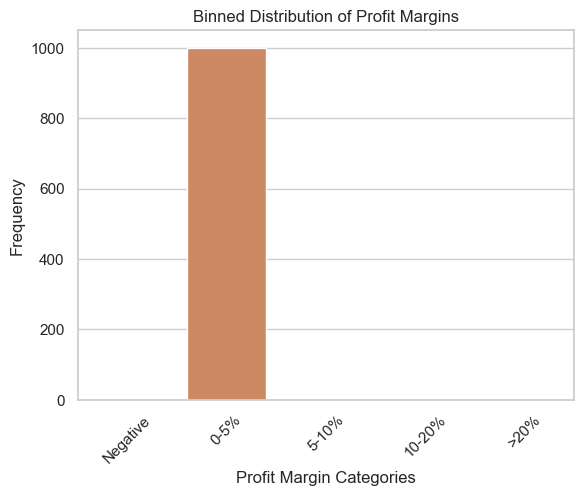

In [12]:
# Plotting
sns.countplot(x=data['Profit Margin Bins'])
plt.title('Binned Distribution of Profit Margins')
plt.xlabel('Profit Margin Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Customer Segmentation via K-Means Clustering
# Assuming 'Age' and 'Total' are relevant features
if 'Age' in data.columns:
    customer_features = data[['Age', 'Total']]
    kmeans = KMeans(n_clusters=3, random_state=0).fit(customer_features)
    data['Customer Segment'] = kmeans.labels_

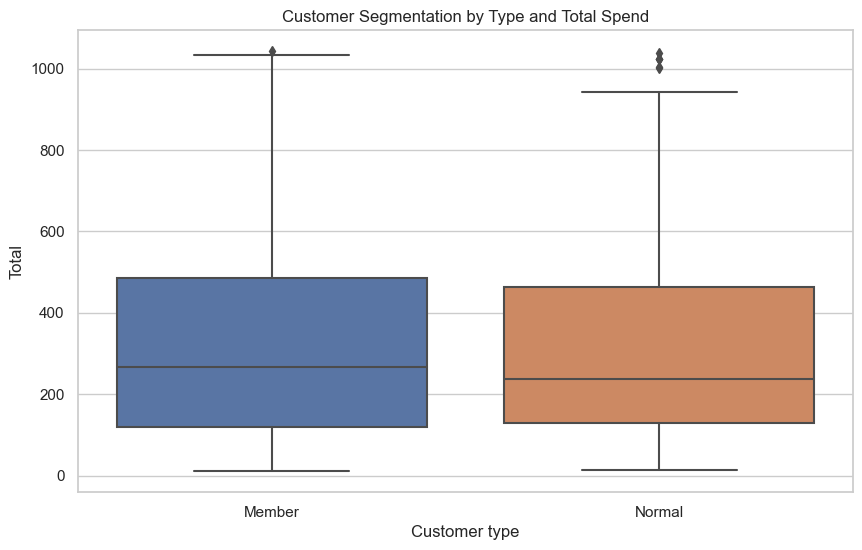

               count        mean         std      min      25%      50%  \
Customer type                                                             
Member         501.0  327.791305  247.993782  10.6785  118.251  266.028   
Normal         499.0  318.122856  243.902800  12.6945  129.234  237.426   

                    75%      max  
Customer type                     
Member         485.5725  1042.65  
Normal         462.6090  1039.29  


In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer type', y='Total', data=data)
plt.title('Customer Segmentation by Type and Total Spend')
plt.show()

print(data.groupby('Customer type')['Total'].describe())


In [15]:
# Time Series Forecasting for Total Sales
data.set_index('Date', inplace=True)
monthly_sales = data['Total'].resample('M').sum()

c:\Users\hifi\OneDrive\Documents\Projects\Supermarket\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


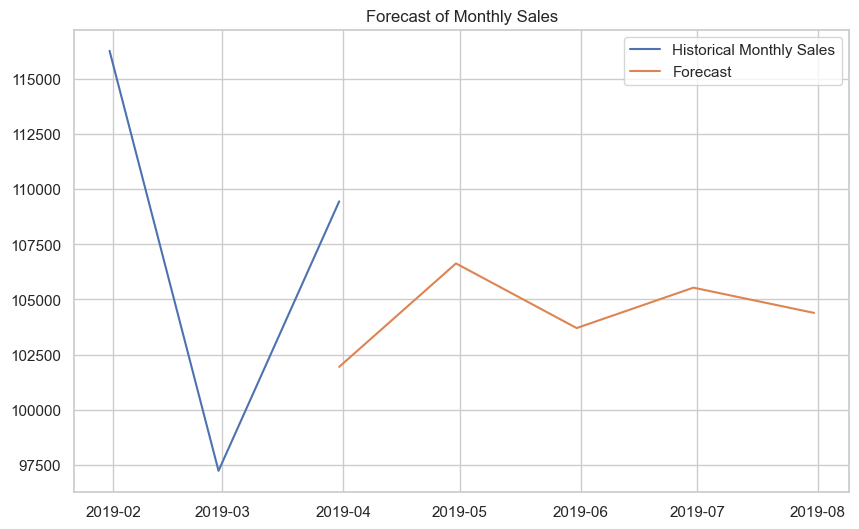

In [16]:
# ARIMA Model for forecasting
model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Monthly Sales')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=5, freq='M'), forecast, label='Forecast')
plt.title('Forecast of Monthly Sales')
plt.legend()
plt.show()

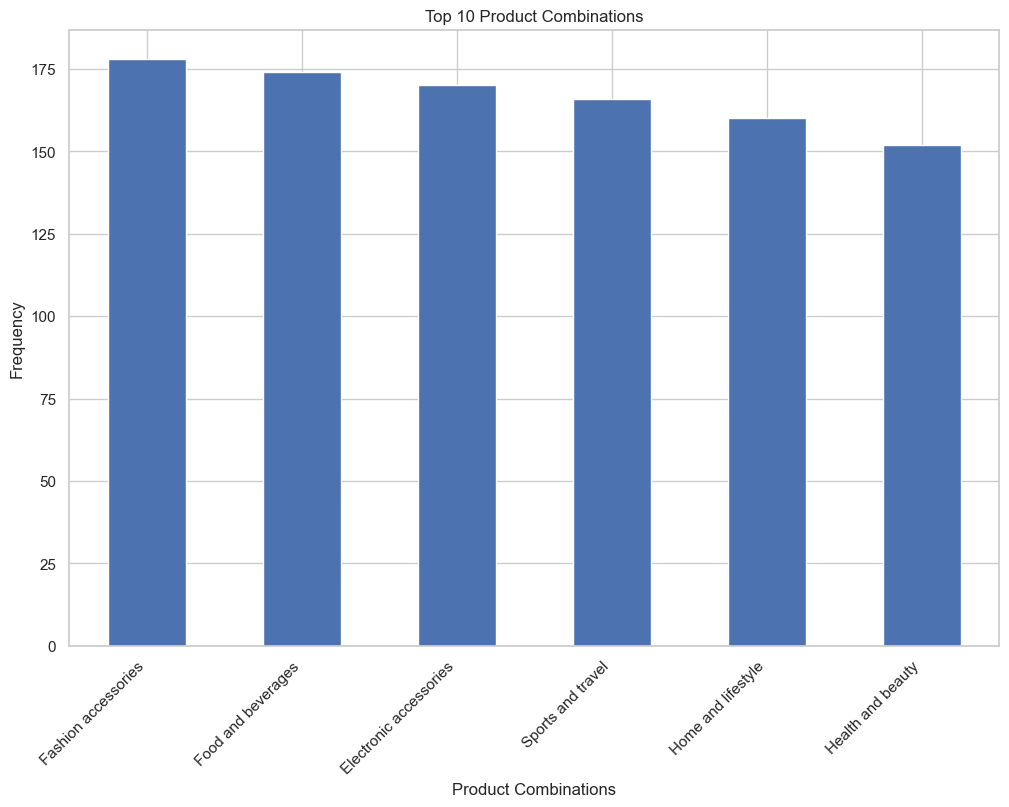

In [17]:
# Example to create a sample dataset where each Invoice ID has multiple products
data['Product Combination'] = data.groupby('Invoice ID')['Product line'].transform(lambda x: ', '.join(x))
data.drop_duplicates(subset=['Invoice ID'], inplace=True)

# Extracting the top 10 frequent combinations
top_combinations = data['Product Combination'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 8))
top_combinations.plot(kind='bar')
plt.title('Top 10 Product Combinations')
plt.xlabel('Product Combinations')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()


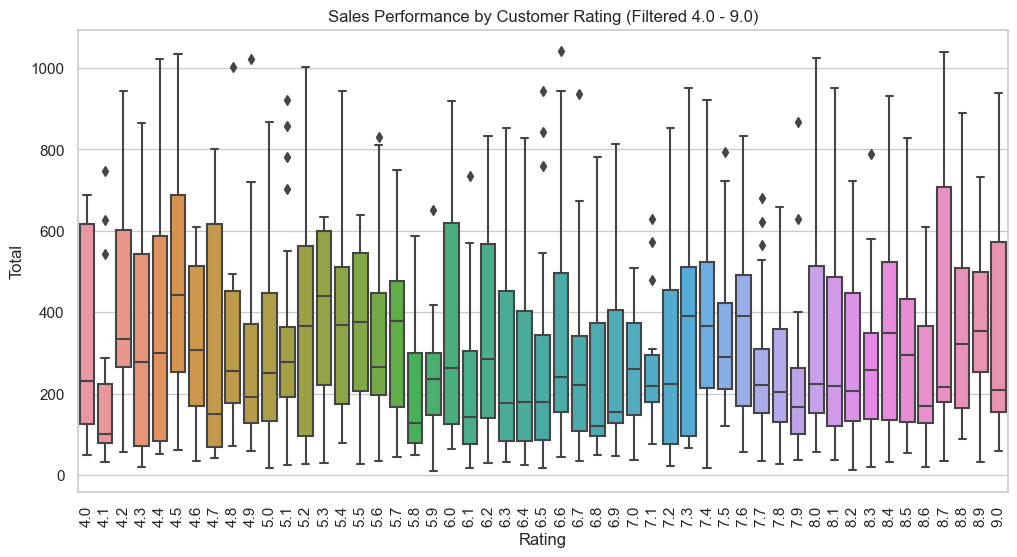

In [18]:
# Filter to show only ratings from 4.0 to 9.0
filtered_data = data[(data['Rating'] >= 4.0) & (data['Rating'] <= 9.0)]

# Plotting with filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rating', y='Total', data=filtered_data)
plt.title('Sales Performance by Customer Rating (Filtered 4.0 - 9.0)')
plt.xticks(rotation=90)  # Rotate labels to 90 degrees for better visibility
plt.show()


In [ ]:
# Save the augmented DataFrame with new features and analysis
data.to_csv(r'C:\Users\hifi\OneDrive\Documents\Projects\Supermarket\augmented_supermarket_sales.csv')